## Data Loading & Preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Visualization Setup
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



In [2]:
# Set theme
sns.set_theme(style="whitegrid")

In [3]:
# Load the dataset
try:
    df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the path")

Dataset loaded successfully!


In [4]:
# Check loaded data
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
# Check dataset shape (rows, columns) and data types
print(f"Dataset Shape: {df.shape}")
print("-" * 30)
df.info()

Dataset Shape: (1470, 35)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement       

#### Handling Missing Values


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns that have missing values
print(missing_values[missing_values > 0])

# Identify Numerical and Categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

# Impute Numerical Missing Values with MEDIAN
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with Median: {median_val}")

# Impute Categorical Missing Values with MODE
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in {col} with Mode: {mode_val}")

print("Missing value handling strategy applied")

Series([], dtype: int64)
Missing value handling strategy applied


In [7]:
# Drop columns with zero variance
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print(f" Dropped constant columns. New shape: {df.shape}")

 Dropped constant columns. New shape: (1470, 31)


In [8]:
## Binary Encoding for the Target Variable 'Attrition'
# Yes -> 1 (Leaving/Left the company)
# No -> 0 (Stayed)
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

## Binary Encoding for 'OverTime'
df['OverTime_Numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

## Label Encoding for 'BusinessTravel'
# Non-Travel=0
# Travel_Rarely=1
# Travel_Frequently=2
travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel_Numeric'] = df['BusinessTravel'].map(travel_map)

# Verify the changes
print("Categorical variables encoded")
print(df[['Attrition', 'Attrition_Numeric', 'OverTime', 'OverTime_Numeric']].head())

Categorical variables encoded
  Attrition  Attrition_Numeric OverTime  OverTime_Numeric
0       Yes                  1      Yes                 1
1        No                  0       No                 0
2       Yes                  1      Yes                 1
3        No                  0      Yes                 1
4        No                  0       No                 0


## Exploratory Data Analysis

In [9]:
# Summary Statistics
print("Summary Statistics for Numerical Data:")
print(df.describe().T)

Summary Statistics for Numerical Data:
                           count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesW

Univariate Analysis:

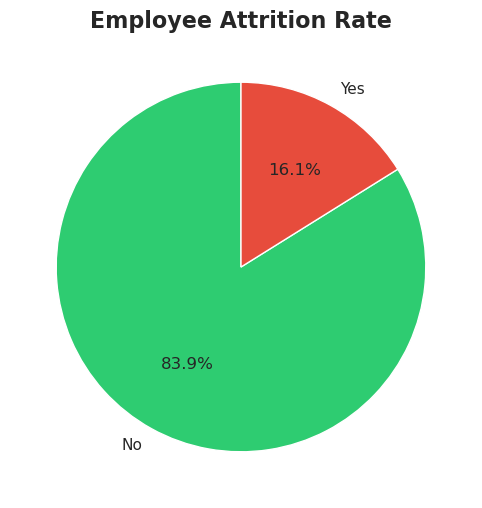

In [10]:
# Overall Attrition Rate
fig, ax = plt.subplots(figsize=(10, 6))
attrition_counts = df['Attrition'].value_counts()
ax.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
       colors=['#2ecc71', '#e74c3c'], startangle=90)
ax.set_title('Employee Attrition Rate', fontsize=16, weight='bold')
plt.show()


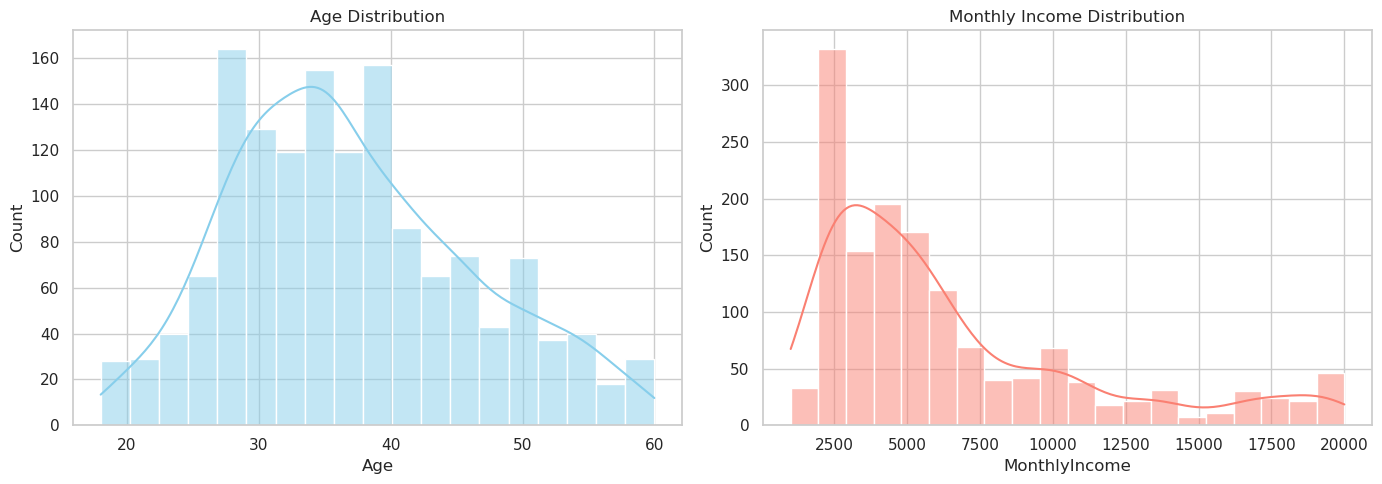

In [11]:
# Numerical Distributions
# Checks for SKEWNESS.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Age
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Histogram for Monthly Income
sns.histplot(df['MonthlyIncome'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Monthly Income Distribution')

plt.tight_layout()
plt.show()

Categorical & Segmentation Analysis

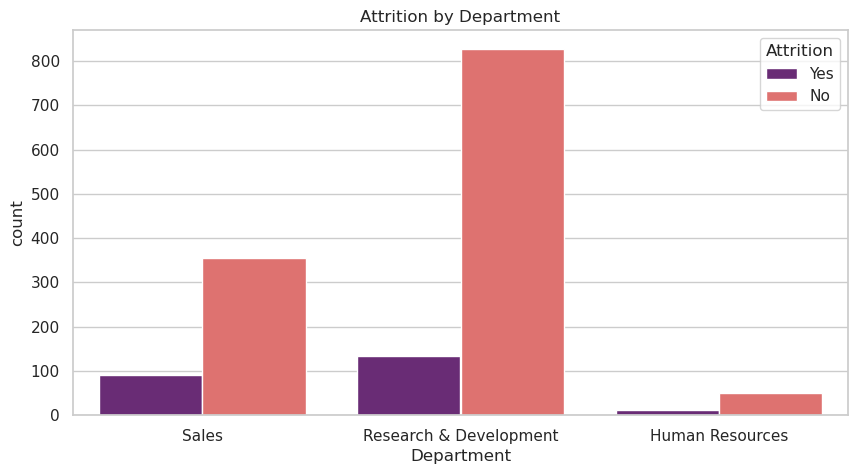

In [12]:
# Attrition by Department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='magma')
plt.title('Attrition by Department')
plt.show()

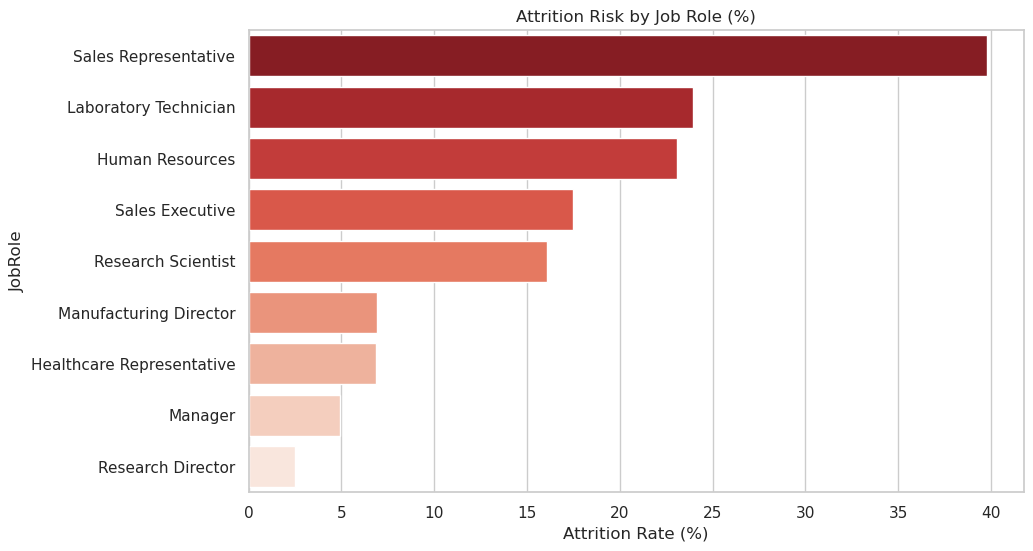

In [13]:
# Calculating percentage of leavers per role
role_attrition = df.groupby('JobRole')['Attrition_Numeric'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=role_attrition.values, y=role_attrition.index, palette='Reds_r')
plt.title('Attrition Risk by Job Role (%)')
plt.xlabel('Attrition Rate (%)')
plt.show()

Variability & Outlier Analysis

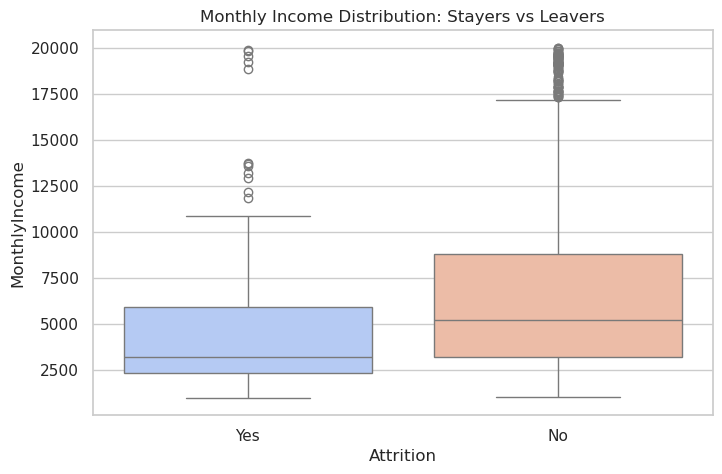

In [14]:
# Box Plots for Income vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, hue='Attrition', legend=False, palette='coolwarm')
plt.title('Monthly Income Distribution: Stayers vs Leavers')
plt.show()

## Statistical Analysis - Diagnostic & Predictive


Correlation Analysis

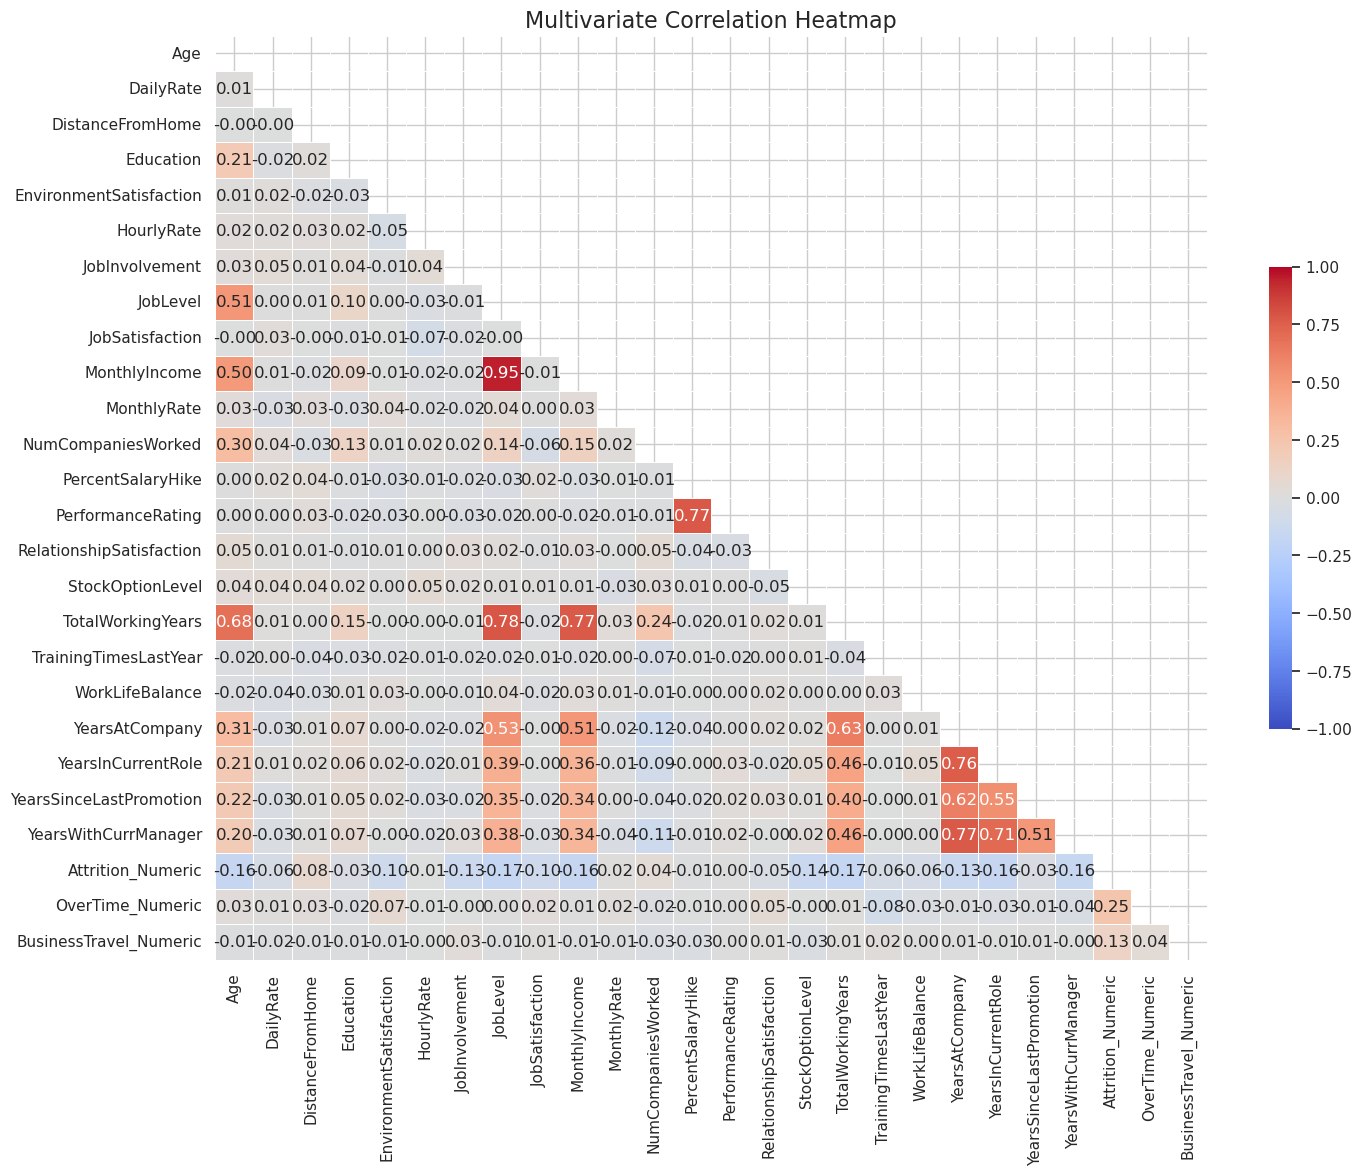

In [15]:
# Multivariate Correlation Heatmap
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Multivariate Correlation Heatmap', fontsize=16)
plt.show()

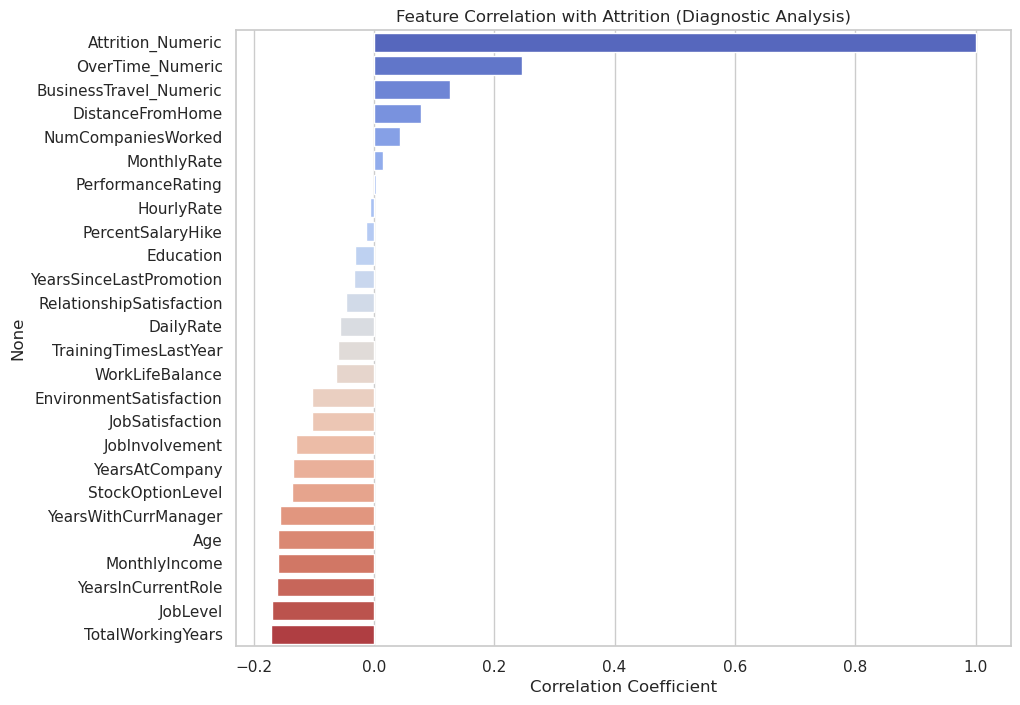

Top 5 Positive Correlations (Factors increasing attrition):
Attrition_Numeric         1.000000
OverTime_Numeric          0.246118
BusinessTravel_Numeric    0.127006
DistanceFromHome          0.077924
NumCompaniesWorked        0.043494
Name: Attrition_Numeric, dtype: float64

Top 5 Negative Correlations (Factors decreasing attrition):
Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
Name: Attrition_Numeric, dtype: float64


In [16]:
# Which variables are most strongly linked to Attrition?

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Visualize specifically the correlation with 'Attrition_Numeric'
plt.figure(figsize=(10, 8))

attrition_corr = corr_matrix['Attrition_Numeric'].sort_values(ascending=False)

# Plotting a bar chart of correlations with Attrition
sns.barplot(x=attrition_corr.values, y=attrition_corr.index, palette='coolwarm', hue=attrition_corr.index, legend=False)
plt.title('Feature Correlation with Attrition (Diagnostic Analysis)')
plt.xlabel('Correlation Coefficient')
plt.show()

print("Top 5 Positive Correlations (Factors increasing attrition):")
print(attrition_corr.head(5))
print("\nTop 5 Negative Correlations (Factors decreasing attrition):")
print(attrition_corr.tail(5))

In [17]:
# T-Test: Income Difference
# H0:- No difference in income between leavers and stayers
income_leavers = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_stayers = df[df['Attrition'] == 'No']['MonthlyIncome']

t_stat, p_value = stats.ttest_ind(income_leavers, income_stayers)

print(f"T-Test (Income)")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4e}")
if p_value < 0.05:
    print("Result: Significant Difference")
else:
    print("Result: No Significant Difference")

--- T-Test (Income) ---
T-Statistic: -6.2039, P-Value: 7.1474e-10
Result: Significant Difference (Reject H0)


In [18]:
# Confidence Interval (Quantifying Uncertainty)
ci = stats.t.interval(confidence=0.95, df=len(income_leavers)-1,
                      loc=np.mean(income_leavers), scale=stats.sem(income_leavers))
print(f"95% CI for Leaver's Income: ${ci[0]:.2f} - ${ci[1]:.2f}")

95% CI for Leaver's Income: $4321.26 - $5252.93


In [19]:
# Chi-Square Test: Categorical Drivers
categorical_drivers = ['OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel']

print("\n Chi-Square Test of Independence")
for col in categorical_drivers:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    sig = "SIGNIFICANT" if p < 0.05 else "Not Significant"
    print(f"{col}: P-Value = {p:.4e} ({sig})")


--- Chi-Square Test of Independence ---
OverTime: P-Value = 8.1584e-21 (SIGNIFICANT)
JobRole: P-Value = 2.7525e-15 (SIGNIFICANT)
MaritalStatus: P-Value = 9.4555e-11 (SIGNIFICANT)
BusinessTravel: P-Value = 5.6086e-06 (SIGNIFICANT)


Segmentation


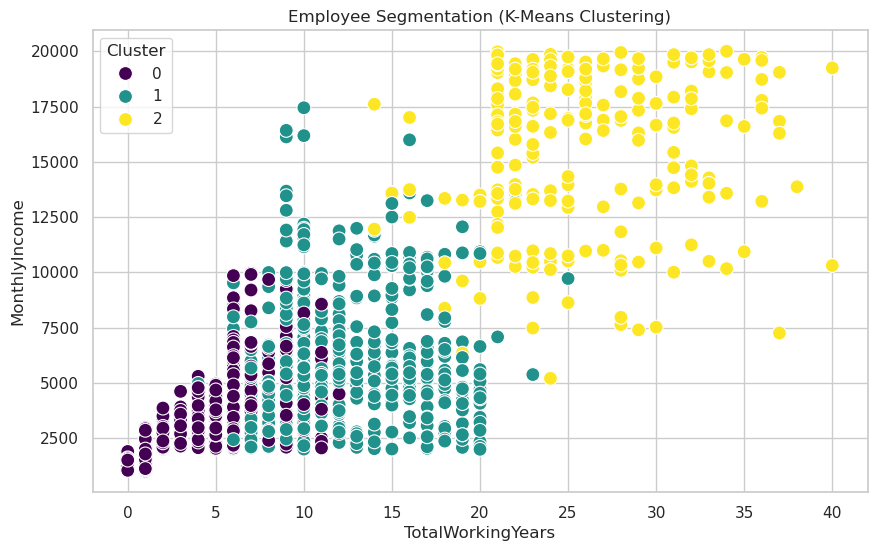

--- Cluster Profiles (Mean Values) ---
               Age  MonthlyIncome  TotalWorkingYears  Attrition_Numeric
Cluster                                                                
0        29.135506    3606.934820           5.279588           0.240137
1        40.064662    6068.206015          11.724812           0.124812
2        47.968468   15410.400901          25.702703           0.063063


In [20]:
# Feature Scaling
cluster_features = df[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Employee Segmentation')
plt.show()

# Cluster Profiling
print("Cluster Profiles (Mean Values)")
print(df.groupby('Cluster')[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition_Numeric']].mean())

Multivariate Analysis

In [21]:
# Define features
features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'OverTime_Numeric',
            'YearsAtCompany', 'NumCompaniesWorked']
target = 'Attrition_Numeric'

X = df[features]
y = df[target]
X = sm.add_constant(X)

# Fit Model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display Results
print(result.summary())

# Odds Ratios
print("\nOdds Ratios (Risk Multipliers)")
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.382483
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Attrition_Numeric   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1463
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.1341
Time:                        22:39:21   Log-Likelihood:                -562.25
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.125e-35
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5221      0.334     -1.565      0.118      -1.176       0.132
Age  